In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
automobile = pd.read_csv('datasets/auto-mpg.csv')
automobile.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
56,26.0,4,91.0,70,1955,20.5,71,1,plymouth cricket
191,22.0,6,225.0,100,3233,15.4,76,1,plymouth valiant
185,26.0,4,98.0,79,2255,17.7,76,1,dodge colt
137,13.0,8,350.0,150,4699,14.5,74,1,buick century luxus (sw)
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina


### data cleaning

In [3]:
automobile.shape

(398, 9)

In [4]:
automobile = automobile.replace('?', np.nan)
automobile.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [5]:
automobile = automobile.dropna()
automobile.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
automobile.drop(['origin', 'car name'], axis= 1, inplace= True)
automobile.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [7]:
automobile['model year'] = '19' + automobile['model year'].astype(str)
automobile.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


In [8]:
automobile['age'] = datetime.datetime.now().year - pd.to_numeric(automobile['model year'])
automobile.drop(['model year'], axis= 1, inplace= True)
automobile.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,50
1,15.0,8,350.0,165,3693,11.5,50
2,18.0,8,318.0,150,3436,11.0,50
3,16.0,8,304.0,150,3433,12.0,50
4,17.0,8,302.0,140,3449,10.5,50


In [9]:
automobile.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [10]:
automobile['horsepower'] = pd.to_numeric(automobile['horsepower'], errors = 'coerce')


In [11]:
automobile.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


### exploring dataset

Text(0, 0.5, 'miles per gallon')

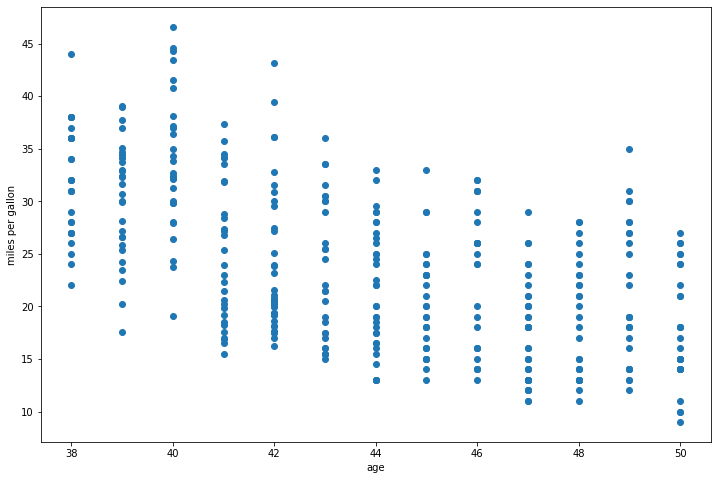

In [12]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(automobile['age'], automobile['mpg'])
plt.xlabel('age')
plt.ylabel('miles per gallon')

Text(0, 0.5, 'miles per gallon')

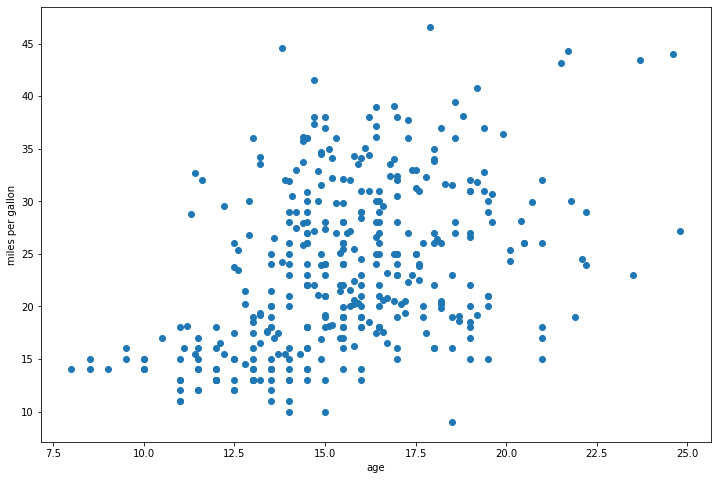

In [13]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(automobile['acceleration'], automobile['mpg'])
plt.xlabel('age')
plt.ylabel('miles per gallon')

Text(0, 0.5, 'miles per gallon')

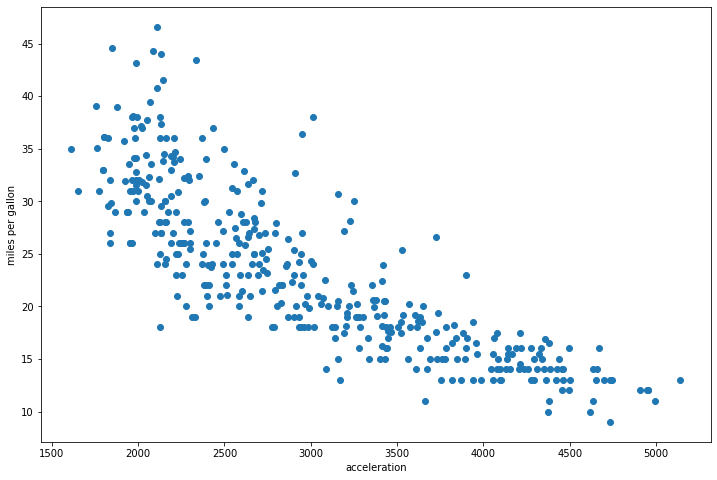

In [14]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(automobile['weight'], automobile['mpg'])
plt.xlabel('acceleration')
plt.ylabel('miles per gallon')

Text(0, 0.5, 'miles per gallon')

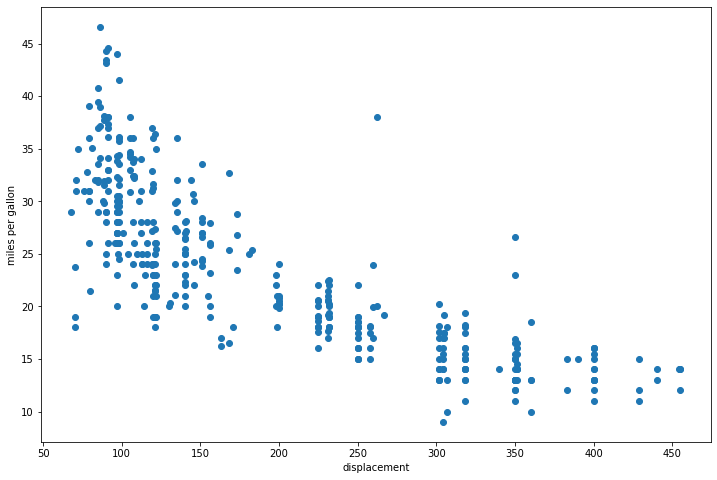

In [15]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(automobile['displacement'], automobile['mpg'])
plt.xlabel('displacement')
plt.ylabel('miles per gallon')

Text(0, 0.5, 'miles per gallon')

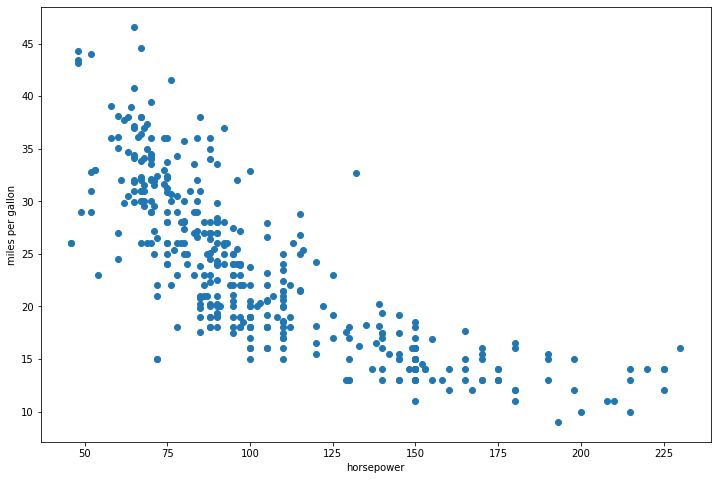

In [16]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(automobile['horsepower'], automobile['mpg'])
plt.xlabel('horsepower')
plt.ylabel('miles per gallon')

Text(0, 0.5, 'miles per gallon')

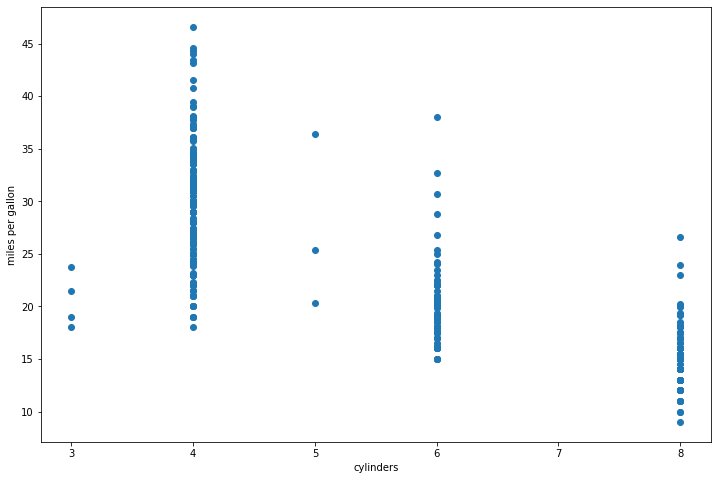

In [17]:
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(automobile['cylinders'], automobile['mpg'])
plt.xlabel('cylinders')
plt.ylabel('miles per gallon')

In [18]:
automobile_corr = automobile.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


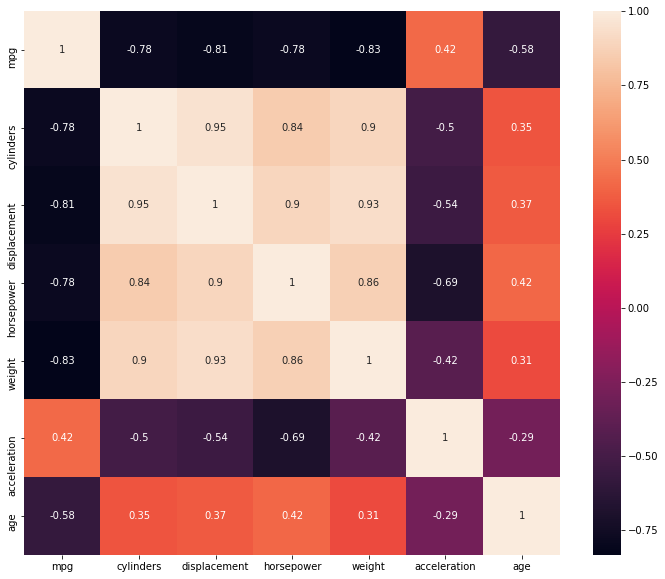

In [19]:
fig, ax = plt.subplots(figsize= (12,10))
sns.heatmap(automobile_corr, annot= True)

In [20]:
automobile = automobile.sample(frac = 1).reset_index(drop= True)
automobile.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,20.5,6,200.0,95,3155,18.2,42
1,23.0,8,350.0,125,3900,17.4,41
2,23.0,4,122.0,86,2220,14.0,49
3,30.0,4,111.0,80,2155,14.8,43
4,12.0,8,350.0,180,4499,12.5,47


In [21]:
automobile.to_csv('datasets/auto-mpg_processed.csv', index= False)

In [22]:
!ls datasets

AAPL.csv			     gender_voice.csv
adult.csv			     german_credit_data_weka_dataset.csv
advertising.csv			     grand_canyon_visits.csv
Ages.csv			     hockey_data
artist_data.csv			     housing.csv
artwork_data.csv		     income_evaluation.csv
athletes.csv			     insurance.csv
austin_weather.csv		     insurance_processed.csv
auto-mpg.csv			     lures.csv
auto-mpg_processed.csv		     LURES.xlsx
bbc-text.csv			     mall_customers.csv
Bike-Sharing-Dataset		     mnist_data
Bike-Sharing-Dataset.zip	     monthly_data.csv
boston_housing.csv		     monthly_sales.csv
cars.csv			     national_parks.csv
clean_car.csv			     nobel.csv
countries2.csv			     obama.csv
countries.csv			     obama_too_big.csv
C_std_diabetes.csv		     salary.csv
Daily_Demand_Forecasting_Orders.csv  sales2.csv
dataset_Facebook.csv		     sales.csv
day.csv				     sector_weighting.csv
diabetes.csv			     stocks.csv
diabetes_processed.csv		     titanic.csv
diabetes_processed_incomplete.csv    titanic_processed.csv
diamonds.csv	

### applying linear regression using single feature

In [23]:
from sklearn.model_selection import train_test_split

X = automobile[['horsepower']]
Y = automobile['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2) 

In [24]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize= True).fit(x_train, y_train)
y_pred = linear_model.predict(x_test)

In [25]:
print('training score: ', linear_model.score(x_train, y_train))

training score:  0.5811184479767687


In [26]:
from sklearn.metrics import r2_score

print('testing score: ', r2_score(y_test, y_pred))

testing score:  0.7048130529973998


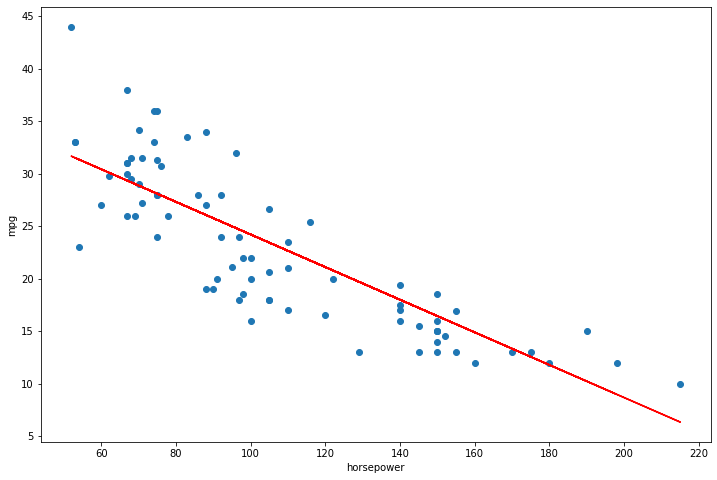

In [27]:
fig, ax = plt.subplots(figsize= (12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color= 'r')

plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

In [28]:
X = automobile[['age']]
Y = automobile['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2) 

linear_model2 = LinearRegression(normalize= True).fit(x_train, y_train)
y_pred = linear_model2.predict(x_test)

print('training score: ', linear_model2.score(x_train, y_train))
print('testing score: ', r2_score(y_test, y_pred))

training score:  0.3524604628150787
testing score:  0.27092475972467256


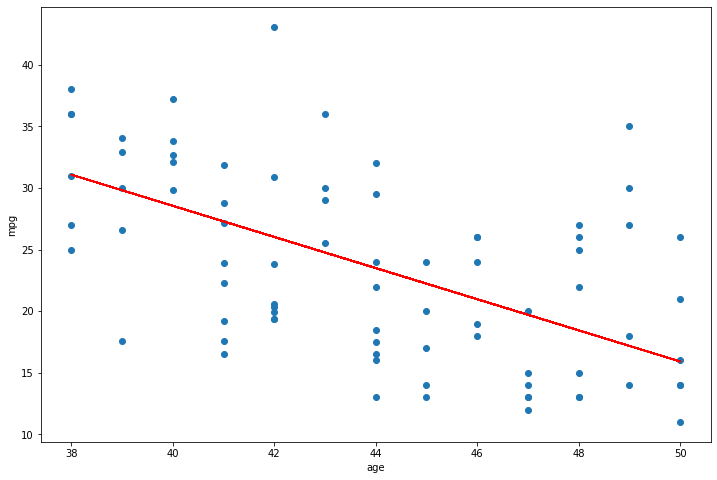

In [29]:
fig, ax = plt.subplots(figsize= (12,8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color= 'r')

plt.xlabel('age')
plt.ylabel('mpg')
plt.show()

### applying linear regression using multiple feature

In [30]:
X = automobile[['displacement', 'horsepower', 'weight']]
Y = automobile['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2) 

linear_model3 = LinearRegression(normalize= True).fit(x_train, y_train)
y_pred = linear_model3.predict(x_test)

print('training score: ', linear_model3.score(x_train, y_train))
print('testing score: ', r2_score(y_test, y_pred))

training score:  0.706160692573264
testing score:  0.708461528079043


In [31]:
predictors = x_train.columns
coef = pd.Series(linear_model3.coef_, predictors).sort_values

print(coef)

<bound method Series.sort_values of displacement   -0.007653
horsepower     -0.033896
weight         -0.005433
dtype: float64>


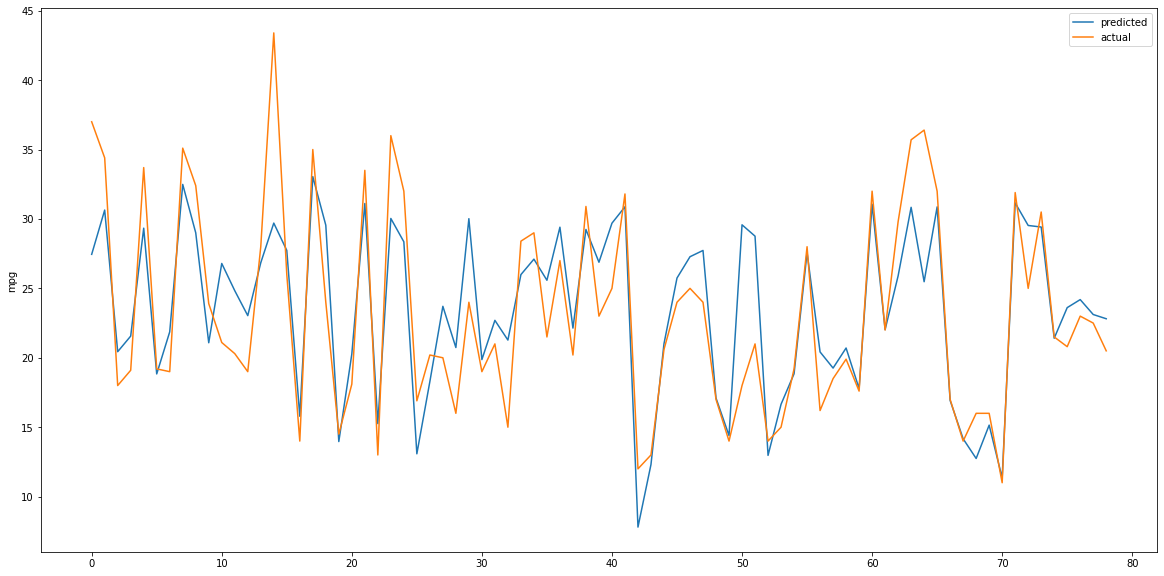

In [32]:
fig, ax = plt.subplots(figsize= (20,10))

plt.plot(y_pred, label= 'predicted')
plt.plot(y_test.values, label= 'actual')

plt.ylabel('mpg')
plt.legend()
plt.show()

In [33]:
X = automobile[['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders']]
Y = automobile['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2) 

linear_model4 = LinearRegression(normalize= True).fit(x_train, y_train)
y_pred = linear_model4.predict(x_test)

print('training score: ', linear_model4.score(x_train, y_train))
print('testing score: ', r2_score(y_test, y_pred))

training score:  0.6972286392024287
testing score:  0.7450572959651455


In [34]:
predictors = x_train.columns
coef = pd.Series(linear_model4.coef_, predictors).sort_values

print(coef)

<bound method Series.sort_values of displacement    0.001291
horsepower     -0.045787
weight         -0.005043
acceleration    0.001701
cylinders      -0.523380
dtype: float64>


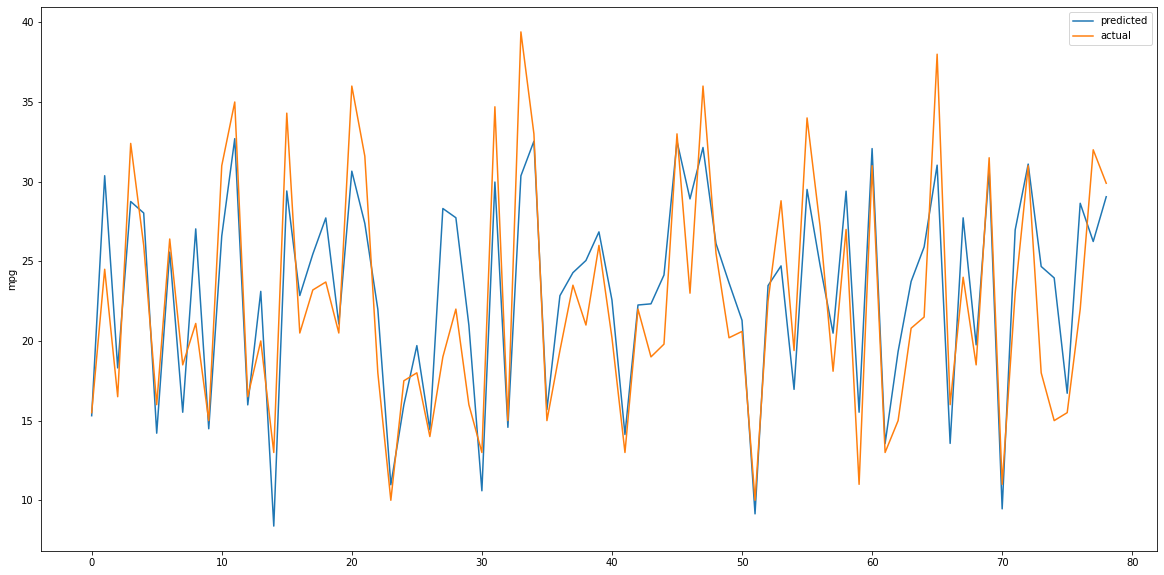

In [35]:
fig, ax = plt.subplots(figsize= (20,10))

plt.plot(y_pred, label= 'predicted')
plt.plot(y_test.values, label= 'actual')

plt.ylabel('mpg')
plt.legend()
plt.show()